<br><br>
# **PCOS Classification with Neural Network**
<br><br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("/content/sample_data/PCOS_data_without_infertility_Cleaned_05102022.csv")
df

,Unnamed: 0,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,1,0,28,44.6,152.000,19.300000,15,78,22,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,1,2,0,36,65.0,161.500,24.921163,15,74,20,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,2,3,1,33,68.8,165.000,25.270891,11,72,18,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,3,4,0,37,65.0,148.000,29.674945,13,72,20,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,4,5,0,25,52.0,161.000,20.060954,11,72,18,...,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,536,537,0,35,50.0,164.592,18.456637,17,72,16,...,0,0,0,110,70,1,0,17.5,10.0,6.7
535,537,538,0,30,63.2,158.000,25.316456,15,72,18,...,0,0,0,110,70,9,7,19.0,18.0,8.2
536,538,539,0,36,54.0,152.000,23.372576,13,74,20,...,0,0,0,110,80,1,0,18.0,9.0,7.3
537,539,540,0,27,50.0,150.000,22.222222,15,74,20,...,1,0,0,110,70,7,6,18.0,16.0,11.5


In [3]:
df = df.drop(['Unnamed: 0', 'Patient File No.'], axis=1)
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,35,50.0,164.592,18.456637,17,72,16,11.00,2,...,0,0,0,110,70,1,0,17.5,10.0,6.7
535,0,30,63.2,158.000,25.316456,15,72,18,10.80,2,...,0,0,0,110,70,9,7,19.0,18.0,8.2
536,0,36,54.0,152.000,23.372576,13,74,20,10.80,2,...,0,0,0,110,80,1,0,18.0,9.0,7.3
537,0,27,50.0,150.000,22.222222,15,74,20,12.00,4,...,1,0,0,110,70,7,6,18.0,16.0,11.5


<br><br>
## **Dividing Dataset into Input & Output**
<br><br>

In [25]:
X = df.iloc[:, 1:42]
Y = df.iloc[:, 0]

In [7]:
X

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.000,19.300000,15,78,22,10.48,2,5,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.500,24.921163,15,74,20,11.70,2,5,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.000,25.270891,11,72,18,11.80,2,5,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.000,29.674945,13,72,20,12.00,2,5,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.000,20.060954,11,72,18,10.00,2,5,...,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,35,50.0,164.592,18.456637,17,72,16,11.00,2,5,...,0,0,0,110,70,1,0,17.5,10.0,6.7
535,30,63.2,158.000,25.316456,15,72,18,10.80,2,5,...,0,0,0,110,70,9,7,19.0,18.0,8.2
536,36,54.0,152.000,23.372576,13,74,20,10.80,2,6,...,0,0,0,110,80,1,0,18.0,9.0,7.3
537,27,50.0,150.000,22.222222,15,74,20,12.00,4,2,...,1,0,0,110,70,7,6,18.0,16.0,11.5


In [8]:
Y

0      0
1      0
2      1
3      0
4      0
      ..
534    0
535    0
536    0
537    0
538    1
Name: PCOS (Y/N), Length: 539, dtype: int64

In [26]:
df['PCOS (Y/N)'] = df['PCOS (Y/N)'].astype('category')
encode_map = {
    '1': 1,
    '0': 0
}

df['PCOS (Y/N)'].replace(encode_map, inplace=True)

<br><br>
## **Splitting train and Test sets**
<br><br>

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=125)

In [28]:
Y_train

393    0
424    1
44     1
152    1
50     1
      ..
299    1
205    1
255    0
226    1
157    1
Name: PCOS (Y/N), Length: 377, dtype: int64

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [35]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, Y_data):
        self.X_data = X_data
        self.Y_data = Y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.Y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(Y_train.to_numpy()))

## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [36]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

<br><br>
## **Defining Neural Network architecture**
<br><br>

In [37]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(41, 92) 
        self.layer_2 = nn.Linear(92, 64)
        self.layer_3 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(92)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
model = BinaryClassification()
model.to(device)
print(model)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=41, out_features=92, bias=True)
  (layer_2): Linear(in_features=92, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(92, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [41]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

<br><br>
## **Training Model**
<br><br>

In [42]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.64265 | Acc: 60.833
Epoch 002: | Loss: 0.47758 | Acc: 80.333
Epoch 003: | Loss: 0.39335 | Acc: 86.667
Epoch 004: | Loss: 0.31788 | Acc: 89.500
Epoch 005: | Loss: 0.28524 | Acc: 91.000
Epoch 006: | Loss: 0.23978 | Acc: 94.000
Epoch 007: | Loss: 0.19420 | Acc: 96.500
Epoch 008: | Loss: 0.16511 | Acc: 97.333
Epoch 009: | Loss: 0.13801 | Acc: 98.333
Epoch 010: | Loss: 0.13166 | Acc: 98.833
Epoch 011: | Loss: 0.09011 | Acc: 99.667
Epoch 012: | Loss: 0.08970 | Acc: 99.167
Epoch 013: | Loss: 0.06654 | Acc: 100.000
Epoch 014: | Loss: 0.05859 | Acc: 100.000
Epoch 015: | Loss: 0.04692 | Acc: 100.000
Epoch 016: | Loss: 0.06705 | Acc: 100.000
Epoch 017: | Loss: 0.03343 | Acc: 100.000
Epoch 018: | Loss: 0.03071 | Acc: 100.000
Epoch 019: | Loss: 0.02693 | Acc: 100.000
Epoch 020: | Loss: 0.02661 | Acc: 100.000
Epoch 021: | Loss: 0.01885 | Acc: 100.000
Epoch 022: | Loss: 0.01931 | Acc: 100.000
Epoch 023: | Loss: 0.01568 | Acc: 100.000
Epoch 024: | Loss: 0.01572 | Acc: 100.000
Epoc

<br><br>
## **Testing Model**
<br><br>

In [43]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


In [45]:
confusion_matrix(Y_test, y_pred_list)

array([[102,   4],
       [  7,  49]])

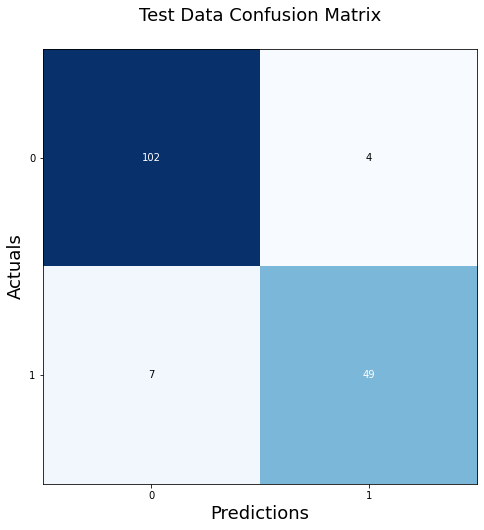

In [49]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred_list)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Test Data Confusion Matrix', fontsize=18)
plt.show()

In [47]:
print(classification_report(Y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.92      0.88      0.90        56

    accuracy                           0.93       162
   macro avg       0.93      0.92      0.92       162
weighted avg       0.93      0.93      0.93       162



<br><br>
## **Saving model learned parameters**
<br><br>

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [54]:
# !ls '/content/gdrive/My Drive'

In [53]:
model_save_name = 'PCOS_classifier.pt'
path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}" 
torch.save(model.state_dict(), path)